           日期    收盤價
55  109/12/01  23.35
56  109/12/02  23.55
57  109/12/03  23.65
58  109/12/04  23.75
59  109/12/07  24.00
..        ...    ...
17  110/03/25  26.80
18  110/03/26  26.60
19  110/03/29  27.25
20  110/03/30  27.50
21  110/03/31  27.00

[78 rows x 2 columns]


<AxesSubplot:>

C:\Users\joshua.lu\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\joshua.lu\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 30436 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\joshua.lu\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\joshua.lu\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\joshua.lu\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30436 missing from curre

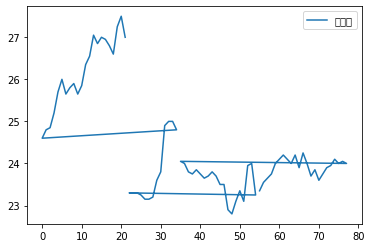

In [13]:
import requests
import json
import pandas as pd
import datetime
import calendar
import time
import numpy as np
import matplotlib.pyplot as plt
import talib

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

def add_months(sourcedate, months):
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day, calendar.monthrange(year, month)[1])
    return datetime.date(year, month, day)


def GetDailyTradePrice(stockId):
    fields = list()
    data = list()
    df = object
    now = datetime.datetime.now()

    index = 0
    while len(data) <= 60:

        # 休息一下再抓, 避免存取過於頻繁被擋
        # time.sleep(np.random.randint({True: 0, False: 10}[index == 0], 30))
        date = add_months(now, -index).strftime("%Y%m%d")
        url = f'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stockId}'
        # print(url)
        res = requests.get(url)
        res.encoding = "utf-8"
        # print(res.text)

        # 讀取json檔
        jsonData = json.loads(res.text)
        fields = jsonData["fields"]
        data.extend(jsonData["data"])
        # print(data)
        index += 1

    df = pd.DataFrame(data=data, columns=fields)
    #print(df)
    df['收盤價'] = df['收盤價'].astype(float)
    return df.sort_values(by='日期')[['日期', '收盤價']]  # 排序


df = GetDailyTradePrice('2356')
print(df)
#sma5 = df.收盤價.rolling(5).mean()
# print(df['收盤價'].rolling(5))
# print(sma5.head(5))

# print(result)

sma1 = talib.SMA(df.收盤價, timeperiod=20)
sma2 = talib.SMA(df.收盤價, timeperiod=60)
# compute buy and sell signals (golden cross and death cross)
signal_long = (sma1 > sma2) & (sma1.shift() < sma2.shift())
signal_short = (sma1 < sma2) & (sma1.shift() > sma2.shift())

# combine long and short signals
signal = signal_long.copy()
signal[signal_short] = -1
df.plot()


C:\Users\joshua.lu\AppData\Local\Programs\Python\Python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


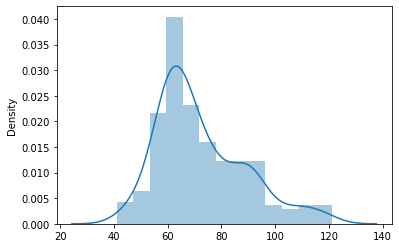

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

l = [41, 44, 46, 46, 47, 47, 48, 48, 49, 51, 52, 53, 53, 53, 53, 55, 55, 55,
     55, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58,
     58, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 60, 61,
     61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 62, 62,
     62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 65,
     65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66,
     67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 69, 69, 69, 70, 70,
     70, 70, 71, 71, 71, 71, 71, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73,
     74, 74, 74, 74, 74, 75, 75, 75, 76, 77, 77, 78, 78, 79, 79, 79, 79, 80,
     80, 80, 80, 81, 81, 81, 81, 83, 84, 84, 85, 86, 86, 86, 86, 87, 87, 87,
     87, 87, 88, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 92,
     92, 93, 93, 93, 94, 95, 95, 96, 98, 98, 99, 100, 102, 104, 105, 107, 108,
     109, 110, 110, 113, 113, 115, 116, 118, 119, 121]

sns.distplot(l, kde=True, rug=False)

plt.show()